# 朱家泓「回後買上漲」策略回測範例

這個筆記本示範如何使用我們的交易策略回測框架來測試朱家泓老師的「回後買上漲」策略。

In [ ]:
# 導入必要的套件
import os
import sys

sys.path.append('..')

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from backtest_engine import BacktestEngine
from config.config import get_config
from strategies.chu_chia_hung_strategy import ChuChiaHungStrategy
from utils import fetch_data, plot_price_and_signals, print_strategy_summary

## 1. 獲取市場資料

In [ ]:
# 選擇要測試的股票
symbol = 'TSLA'
period = '5y'  # 5年的資料

# 獲取資料
print(f"正在獲取 {symbol} 的資料...")
data = fetch_data(symbol, period=period)
print(f"獲取了 {len(data)} 筆資料")
data.head()

正在獲取 TSLA 的資料...
獲取了 1255 筆資料


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-08-28 00:00:00-04:00,153.007996,154.565994,145.768005,147.559998,301218000,0.0,0.0
2020-08-31 00:00:00-04:00,148.203339,166.713333,146.703339,166.106674,355123200,0.0,5.0
2020-09-01 00:00:00-04:00,167.380005,167.496674,156.836670,158.350006,269523300,0.0,0.0
2020-09-02 00:00:00-04:00,159.663330,159.679993,135.039993,149.123337,288528300,0.0,0.0
2020-09-03 00:00:00-04:00,135.743332,143.933334,134.000000,135.666672,262788300,0.0,0.0


## 2. 創建交易策略

In [ ]:
# 創建朱家泓交易策略
strategy = ChuChiaHungStrategy(
    name="朱家泓回後買上漲策略",
    initial_capital=100000
)

print(f"策略名稱: {strategy.name}")
print(f"初始資金: ${strategy.initial_capital:,.2f}")

策略名稱: 朱家泓回後買上漲策略
初始資金: $100,000.00


## 3. 運行回測

In [ ]:
# 創建回測引擎
backtest_config = get_config('backtest')
engine = BacktestEngine(
    initial_capital=backtest_config['initial_capital'],
    commission=backtest_config['commission']
)

# 運行回測
print("開始回測...")
result = engine.run_backtest(strategy, data, symbol)
print("回測完成!")

開始回測...
回測完成!


## 4. 分析結果

In [ ]:
# 顯示策略摘要
performance = result['performance']
print_strategy_summary(strategy.name, performance)


策略： 朱家泓回後買上漲策略
總回報率： 228.13%
年化回報率： 26.95%
波動率： 11.70%
夏普比率： 2.304
最大回撤： 1.80%
總交易次數： 44

Strategy: 朱家泓回後買上漲策略
Total Return: 228.13%
Annualized Return: 26.95%
Volatility: 11.70%
Sharpe Ratio: 2.304
Max Drawdown: 1.80%
Total Trades: 44


In [ ]:
# 顯示交易記錄
trades_df = pd.DataFrame(result['trades'])
if not trades_df.empty:
    print(f"總交易次數: {len(trades_df)}")
    print("前10筆交易:")
    print(trades_df.head(10))
else:
    print("沒有執行任何交易")

總交易次數: 44
前10筆交易:
                  timestamp symbol  quantity       price         value  \
0 2021-07-29 00:00:00-04:00   TSLA        44  225.783340   9934.466980   
1 2021-08-16 00:00:00-04:00   TSLA       -44  228.723328 -10063.826416   
2 2021-08-18 00:00:00-04:00   TSLA        43  229.663330   9875.523193   
3 2021-08-19 00:00:00-04:00   TSLA       -43  224.490005  -9653.070236   
4 2021-08-23 00:00:00-04:00   TSLA        42  235.433334   9888.200043   
5 2021-08-26 00:00:00-04:00   TSLA       -42  233.720001  -9816.240051   
6 2021-08-30 00:00:00-04:00   TSLA        41  243.636673   9989.103592   
7 2021-09-20 00:00:00-04:00   TSLA       -41  243.389999  -9978.989975   
8 2021-09-24 00:00:00-04:00   TSLA        38  258.130005   9808.940186   
9 2021-11-12 00:00:00-05:00   TSLA       -38  344.473328 -13089.986450   

   capital_after  
0   90065.533020  
1  100129.359436  
2  100307.598832  
3  109960.669068  
4  109715.886192  
5  119532.126243  
6  119349.446462  
7  129328.43643

## 5. 視覺化分析

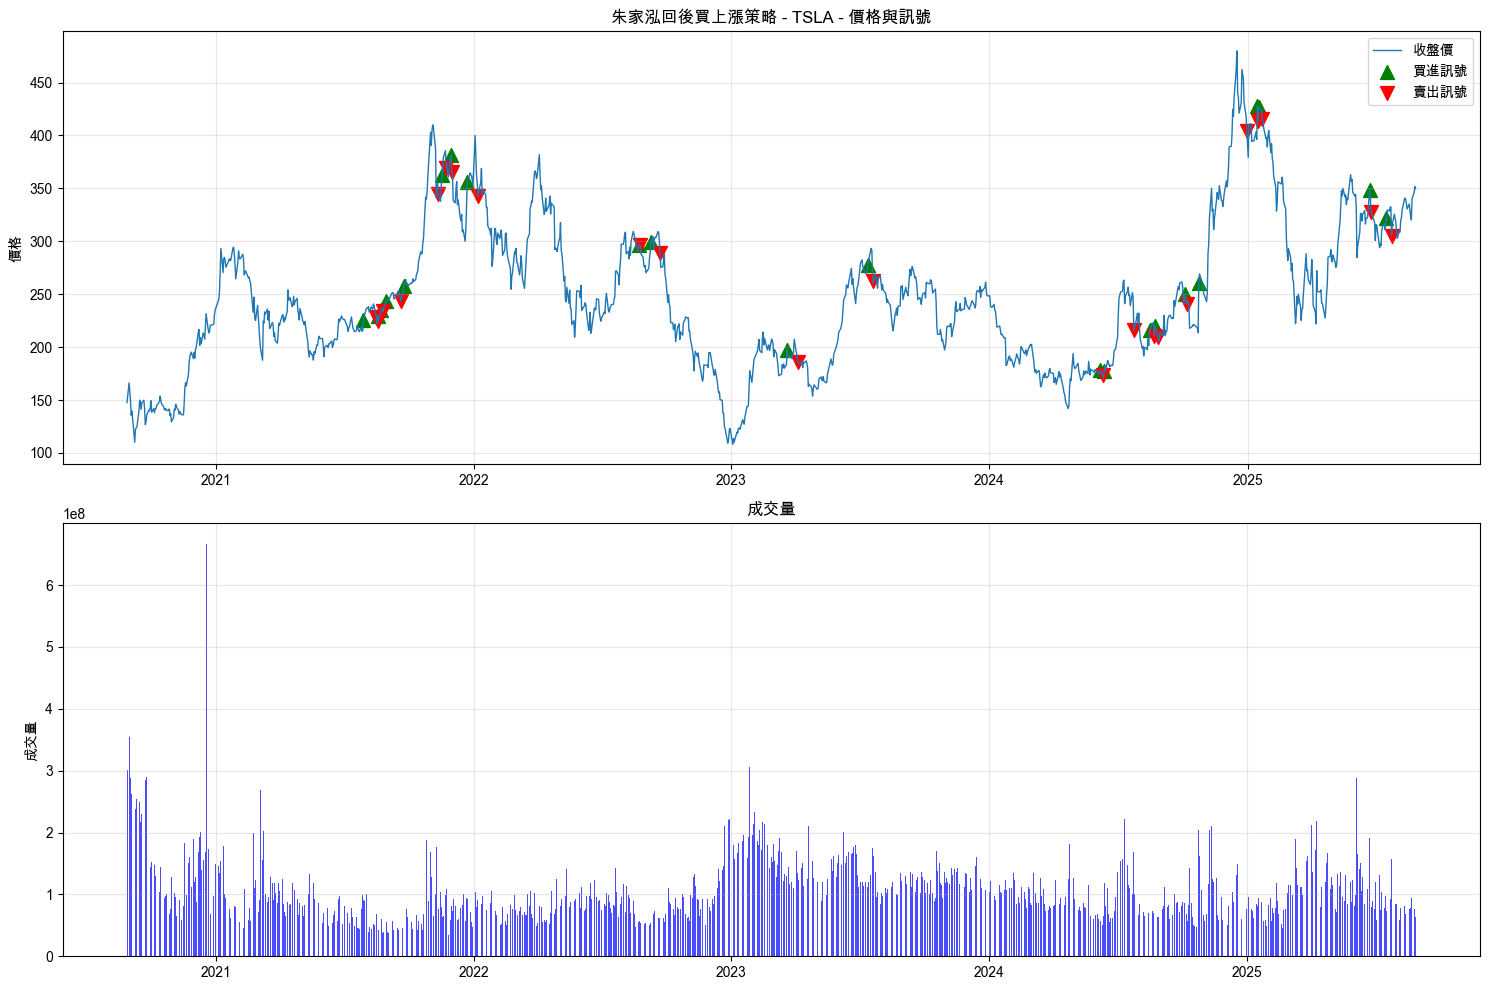

In [ ]:
# 繪製價格和交易信號
signals_data = result['signals_data']
plot_price_and_signals(signals_data, f"{strategy.name} - {symbol}")

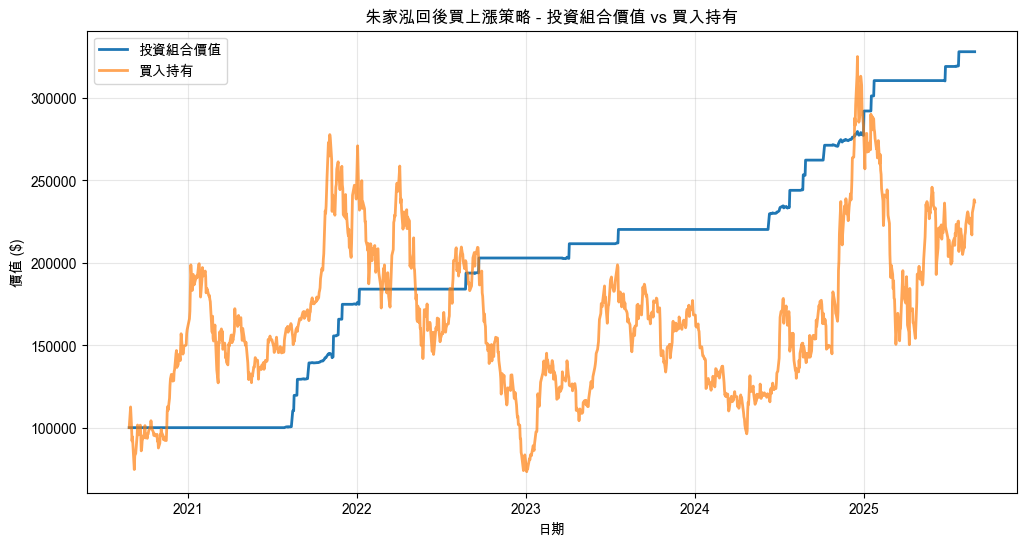

績效比較:
策略總回報: 228.13%
買入持有回報: 136.92%
超額回報: 91.21%


In [ ]:
# 繪製投資組合價值變化
portfolio_value = result['portfolio_value']
if portfolio_value:
    plt.figure(figsize=(12, 6))
    
    # 投資組合價值
    portfolio_series = pd.Series(portfolio_value, index=data.index[:len(portfolio_value)])
    plt.plot(portfolio_series.index, portfolio_series.values, label='投資組合價值', linewidth=2)
    
    # 買入持有策略比較
    buy_hold_value = (data['Close'] / data['Close'].iloc[0]) * strategy.initial_capital
    plt.plot(data.index, buy_hold_value, label='買入持有', linewidth=2, alpha=0.7)
    
    plt.title(f'{strategy.name} - 投資組合價值 vs 買入持有')
    plt.xlabel('日期')
    plt.ylabel('價值 ($)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
    
    # 計算買入持有的績效
    buy_hold_return = (buy_hold_value.iloc[-1] / strategy.initial_capital) - 1
    strategy_return = performance.get('total_return', 0)
    
    print(f"績效比較:")
    print(f"策略總回報: {strategy_return:.2%}")
    print(f"買入持有回報: {buy_hold_return:.2%}")
    print(f"超額回報: {(strategy_return - buy_hold_return):.2%}")